# Oversempling Method

In [153]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# Load the datasets
diabetes = pd.read_csv('../../cleaned_datasets/cleaned_diabetes.csv')
heart_disease = pd.read_csv('../../cleaned_datasets/heart-disease-cleaned.csv')
stroke = pd.read_csv('../../cleaned_datasets/normalized_stroke_dataset.csv')
hypertension = pd.read_csv('../../cleaned_datasets/hypertension_cleaned.csv')

print(diabetes.duplicated().sum())
print(heart_disease.duplicated().sum())
print(stroke.duplicated().sum())
print(hypertension.duplicated().sum())

0
1717
0
0


In [155]:
# Data Exploration
def explore_dataset(df, name):
    print(f"\nExploring {name} dataset:")
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    
    # Display first few rows
    print("\nFirst few rows:")
    print(df.head())
    
    # Basic statistics
    print("\nBasic statistics:")
    print(df.describe())

datasets = {
        'Diabetes': diabetes,
        'Heart Disease': heart_disease,
        'Stroke': stroke,
        'Hypertension': hypertension
    }
    
for name, df in datasets.items():
    explore_dataset(df, name)


Exploring Diabetes dataset:

Shape: (88195, 9)

Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data types:
 gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

First few rows:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0    

## Data Cleaning

In [156]:
def handle_outliers(df, columns_to_check, method='iqr'):
    """
    Handle outliers in specified columns using either IQR method or Z-score
    """
    df_clean = df.copy()
    
    for column in columns_to_check:
        if method == 'iqr':
            # Calculate IQR
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Handle outliers by capping
            df_clean[column] = df_clean[column].clip(lower_bound, upper_bound)
            
        elif method == 'zscore':
            # Calculate Z-score
            z_scores = np.abs((df_clean[column] - df_clean[column].mean()) / df_clean[column].std())
            
            # Cap values where z-score > 3
            df_clean.loc[z_scores > 3, column] = df_clean[column].mean()
    
    return df_clean

def remove_duplicates(df):
    """
    Remove duplicate rows while keeping the first occurrence
    """
    initial_rows = len(df)
    df_unique = df.drop_duplicates()
    removed_rows = initial_rows - len(df_unique)
    print(f"Removed {removed_rows} duplicate rows")
    return df_unique

In [157]:
# Diabetes Dataset
def clean_diabetes_data(df):
    # Copy dataframe to avoid modifications to original
    df_clean = df.copy()

    # Handle outliers in BMI (using domain knowledge)
    df_clean = handle_outliers(df_clean, ['bmi'], method='iqr')
    
    # Check and handle any missing values
    if df_clean.isnull().sum().any():
        df_clean = df_clean.dropna()

    # Remove duplicate rows
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

diabetes_cleaned = clean_diabetes_data(diabetes)

Removed 56 duplicate rows


In [158]:
# Heart Disease Dataset
def clean_heart_disease_data(df):
    df_clean = df.copy()
    
    # Ensure numerical values are float
    numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    df_clean[numeric_columns] = df_clean[numeric_columns].astype(float)

    # Handle outliers in numerical columns
    df_clean = handle_outliers(df_clean, numeric_columns, method='iqr')
    
    # Convert categorical variables if needed
    categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    for col in categorical_columns:
        df_clean[col] = df_clean[col].astype(int)

    # Remove duplicates
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

heart_cleaned = clean_heart_disease_data(heart_disease)

heart_cleaned.head(10)

# Also apply for hypertension since they have the same feature
hypertension_cleaned = clean_heart_disease_data(hypertension)

print(heart_cleaned.head(10))
print(hypertension.head(10))

Removed 1717 duplicate rows
Removed 0 duplicate rows
     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   51.0    0   2     130.0  256.0    0        0    149.0      0      0.5   
1   61.0    1   0     138.0  166.0    0        0    125.0      1      3.6   
2   63.0    0   0     124.0  197.0    0        1    136.0      1      0.0   
3   68.0    1   0     144.0  193.0    1        1    141.0      0      3.4   
4   61.0    1   2     150.0  243.0    1        1    137.0      1      1.0   
5   63.0    0   2     135.0  252.0    0        0    172.0      0      0.0   
7   48.0    1   0     124.0  274.0    0        0    166.0      0      0.5   
8   46.0    0   0     138.0  243.0    0        0    152.0      1      0.0   
9   40.0    1   0     152.0  223.0    0        1    181.0      0      0.0   
10  66.0    1   0     120.0  302.0    0        0    151.0      0      0.4   

    slope  ca  thal  target  
0       2   0     2       1  
1       1   1     2       0  
2       1

In [159]:
# Sroke Disease Dataset
def clean_stroke_data(df):
    df_clean = df.copy()

    # Handle outliers in BMI and other numerical columns
    numeric_columns = ['bmi', 'age']
    df_clean = handle_outliers(df_clean, numeric_columns, method='iqr')
    
    # Convert smoking_status to numeric
    smoking_map = {
        'never smoked': 0,
        'Unknown': 0,
        'formerly smoked': 2,
        'smokes': 1
    }
    df_clean['smoking_status'] = df_clean['smoking_status'].map(smoking_map)
    
    # Ensure sex is binary (0: Female, 1: Male)
    le = LabelEncoder()
    df_clean['sex'] = le.fit_transform(df_clean['sex'])

    # Remove duplicates
    df_clean = remove_duplicates(df_clean)
    
    return df_clean

stroke_cleaned = clean_stroke_data(stroke)

stroke_cleaned.head(10)

Removed 0 duplicate rows


,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke
0,67,0,1,36.600000,228.69,0,2,1
1,61,0,0,28.893237,202.21,1,0,1
2,80,0,1,32.500000,105.92,0,0,1
3,49,0,0,34.400000,171.23,1,1,1
4,79,1,0,24.000000,174.12,1,0,1
5,81,0,0,29.000000,186.21,0,2,1
6,74,1,1,27.400000,70.09,0,0,1
7,69,0,0,22.800000,94.39,1,0,1
8,59,0,0,28.893237,76.15,1,0,1
9,78,0,0,24.200000,58.57,1,0,1


### Feature selection

In [160]:
def select_common_features(diabetes_df, heart_df, stroke_df, hypertension_df):
    # Select relevant features from each dataset
    diabetes_features = diabetes_df[['age', 'gender', 'bmi', 'blood_glucose_level', 'diabetes']]
    heart_features = heart_df[['age', 'sex', 'trestbps', 'chol', 'target']]
    stroke_features = stroke_df[['age', 'sex', 'bmi', 'hypertension', 'stroke']]
    hypertension_features = hypertension_df[['age', 'sex', 'trestbps', 'chol', 'target']]
    
    # Rename columns for consistency
    diabetes_features = diabetes_features.rename(columns={
        'gender': 'sex',
        'diabetes': 'target_diabetes'
    })
    
    heart_features = heart_features.rename(columns={
        'trestbps': 'blood_pressure',
        'target': 'target_heart'
    })
    
    stroke_features = stroke_features.rename(columns={
        'stroke': 'target_stroke'
    })
    
    hypertension_features = hypertension_features.rename(columns={
        'trestbps': 'blood_pressure',
        'target': 'target_hypertension'
    })
    
    # Remove duplicates after feature selection
    print("\nBefore removing duplicates:")
    print(f"Diabetes features shape: {diabetes_features.shape}")
    print(f"Heart features shape: {heart_features.shape}")
    print(f"Stroke features shape: {stroke_features.shape}")
    print(f"Hypertension features shape: {hypertension_features.shape}")
    
    diabetes_features = diabetes_features.drop_duplicates()
    heart_features = heart_features.drop_duplicates()
    stroke_features = stroke_features.drop_duplicates()
    hypertension_features = hypertension_features.drop_duplicates()
    
    print("\nAfter removing duplicates:")
    print(f"Diabetes features shape: {diabetes_features.shape}")
    print(f"Heart features shape: {heart_features.shape}")
    print(f"Stroke features shape: {stroke_features.shape}")
    print(f"Hypertension features shape: {hypertension_features.shape}")
    
    # Additional check for data quality
    def check_dataset(df, name):
        print(f"\nChecking {name} dataset:")
        print("Null values:\n", df.isnull().sum())
        print("Value counts for target:")
        target_col = [col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]
        print(df[target_col].value_counts())
    
    for df, name in zip([diabetes_features, heart_features, stroke_features, hypertension_features],
                       ['Diabetes', 'Heart Disease', 'Stroke', 'Hypertension']):
        check_dataset(df, name)
    
    return diabetes_features, heart_features, stroke_features, hypertension_features

# Test the updated function
diabetes_features, heart_features, stroke_features, hypertension_features = select_common_features(
    diabetes_cleaned, heart_cleaned, stroke_cleaned, hypertension_cleaned
)

# Verify no duplicates remain
print("\nFinal duplicate check:")
print(f"Diabetes duplicates: {diabetes_features.duplicated().sum()}")
print(f"Heart disease duplicates: {heart_features.duplicated().sum()}")
print(f"Stroke duplicates: {stroke_features.duplicated().sum()}")
print(f"Hypertension duplicates: {hypertension_features.duplicated().sum()}")


Before removing duplicates:
Diabetes features shape: (88139, 5)
Heart features shape: (283, 5)
Stroke features shape: (5109, 5)
Hypertension features shape: (24422, 5)

After removing duplicates:
Diabetes features shape: (67681, 5)
Heart features shape: (283, 5)
Stroke features shape: (4706, 5)
Hypertension features shape: (23694, 5)

Checking Diabetes dataset:
Null values:
 age                    0
sex                    0
bmi                    0
blood_glucose_level    0
target_diabetes        0
dtype: int64
Value counts for target:
target_diabetes
0    63542
1     4139
Name: count, dtype: int64

Checking Heart Disease dataset:
Null values:
 age               0
sex               0
blood_pressure    0
chol              0
target_heart      0
dtype: int64
Value counts for target:
target_heart
1    158
0    125
Name: count, dtype: int64

Checking Stroke dataset:
Null values:
 age              0
sex              0
bmi              0
hypertension     0
target_stroke    0
dtype: int64
Valu


Data Quality Check for Diabetes:
Outliers in age: 0
Outliers in sex: 0
Outliers in bmi: 0
Outliers in blood_glucose_level: 0
Outliers in target_diabetes: 4139
Number of duplicate rows: 0


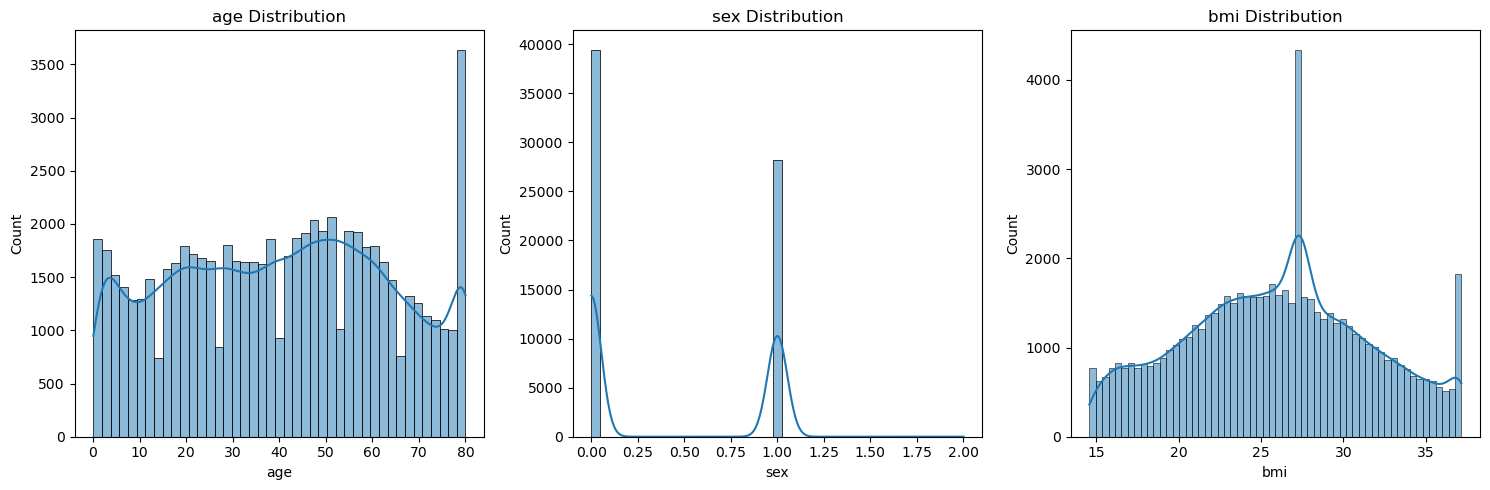


Data Quality Check for Heart Disease:
Outliers in age: 0
Outliers in sex: 0
Outliers in blood_pressure: 0
Outliers in chol: 0
Outliers in target_heart: 0
Number of duplicate rows: 0


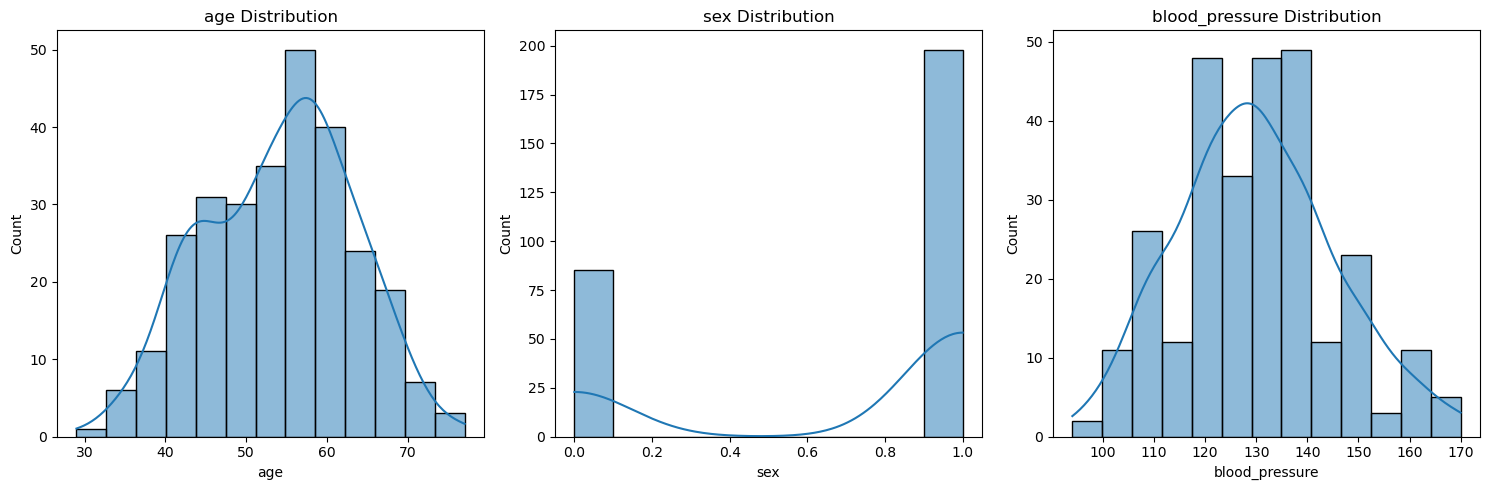


Data Quality Check for Stroke:
Outliers in age: 0
Outliers in sex: 0
Outliers in bmi: 1
Outliers in hypertension: 486
Outliers in target_stroke: 239
Number of duplicate rows: 0


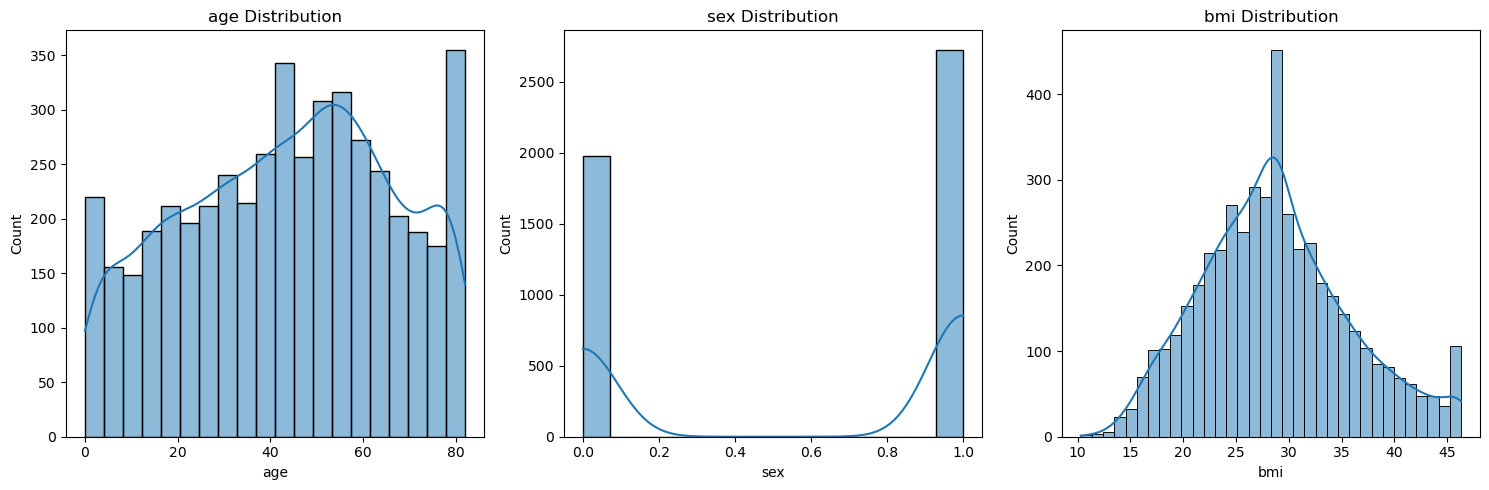


Data Quality Check for Hypertension:
Outliers in age: 0
Outliers in sex: 0
Outliers in blood_pressure: 0
Outliers in chol: 0
Outliers in target_hypertension: 0
Number of duplicate rows: 0


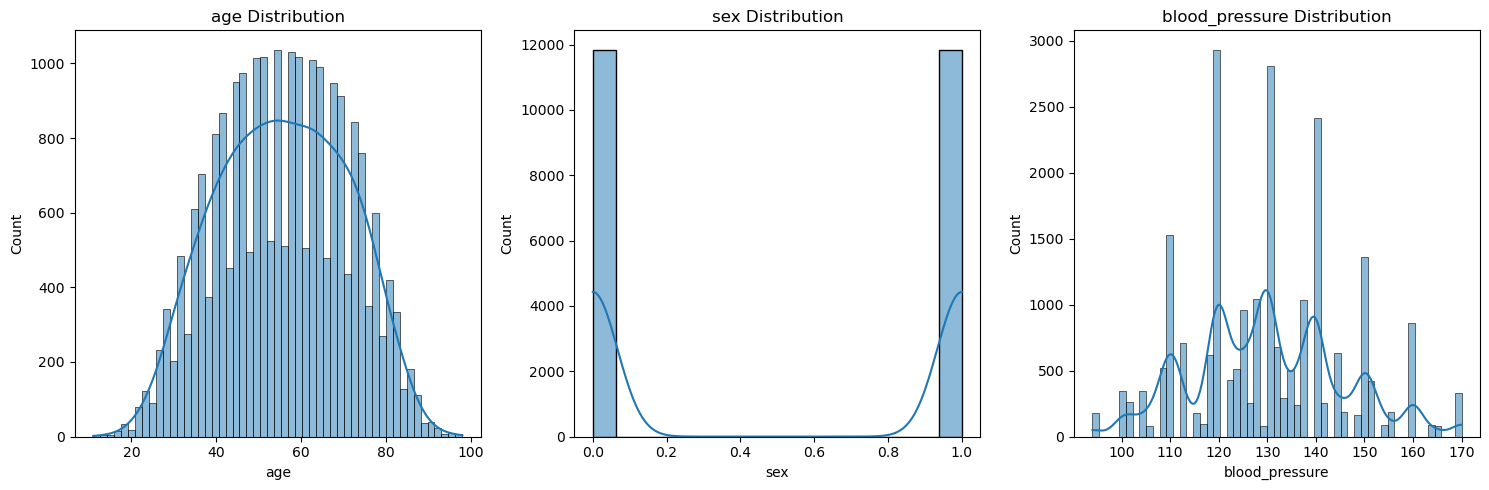

In [161]:
# Check Data Quality
def check_data_quality(df, name):
    print(f"\nData Quality Check for {name}:")
    
    # Check for outliers using IQR method
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"Outliers in {col}: {outliers}")
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    # Distribution plots for numeric columns
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numeric_cols[:3], 1):  # Limit to first 3 columns for brevity
        plt.subplot(1, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

for name, df in {
        'Diabetes': diabetes_features,
        'Heart Disease': heart_features,
        'Stroke': stroke_features,
        'Hypertension': hypertension_features
    }.items():
        check_data_quality(df, name)

In [162]:
print(f"Diabetes shape: {diabetes_features.shape}")
print(f"Heart disease shape: {heart_features.shape}")
print(f"Stroke shape: {stroke_features.shape}")
print(f"Hypertension shape: {hypertension_features.shape}")

Diabetes shape: (67681, 5)
Heart disease shape: (283, 5)
Stroke shape: (4706, 5)
Hypertension shape: (23694, 5)


### Oversampled - 2

In [163]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import defaultdict

def apply_oversampling(df, target_size, method='random'):
    """
    Apply oversampling to match target size using specified method
    """
    # Separate features and target
    X = df.drop(columns=[col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col])
    y = df[[col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]]
    
    # Calculate sampling strategy to reach exact target size
    n_samples = defaultdict(int)
    unique_labels = np.unique(y)
    base_size = target_size // len(unique_labels)
    remainder = target_size % len(unique_labels)
    
    for label in unique_labels:
        n_samples[label] = base_size + (1 if remainder > 0 else 0)
        remainder -= 1
    
    try:
        # Apply specified oversampling method
        if method == 'random':
            oversample = RandomOverSampler(sampling_strategy=n_samples, random_state=42)
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
        elif method == 'smote':
            oversample = SMOTE(sampling_strategy=n_samples, random_state=42, k_neighbors=min(5, len(df)-1))
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
        elif method == 'adasyn':
            # ADASYN doesn't support exact sample size, so we'll oversample and then randomly select
            oversample = ADASYN(random_state=42, n_neighbors=min(5, len(df)-1))
            X_resampled, y_resampled = oversample.fit_resample(X, y)
            
            # If we got more samples than needed, randomly select the target size
            if len(X_resampled) > target_size:
                indices = np.random.choice(len(X_resampled), target_size, replace=False)
                X_resampled = X_resampled.iloc[indices]
                y_resampled = y_resampled.iloc[indices]
            
        # Combine features and target back into a dataframe
        resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
        return resampled_df
        
    except ValueError as e:
        print(f"Error with {method} for dataset: {e}")
        return None

def oversample_all_datasets(diabetes_df, heart_df, stroke_df, hypertension_df):
    target_size = len(diabetes_df)  # Size to match (67681)
    # methods = ['random', 'smote', 'adasyn']
    methods = ['smote']
    
    resampled_datasets = {}
    
    for method in methods:
        print(f"\nApplying {method.upper()} oversampling:")
        
        # Diabetes dataset stays the same
        resampled_datasets[f'diabetes_{method}'] = diabetes_df
        
        # Oversample heart disease dataset
        heart_resampled = apply_oversampling(heart_df, target_size, method)
        resampled_datasets[f'heart_{method}'] = heart_resampled
        print(f"Heart Disease dataset after {method}: {len(heart_resampled)} samples")
        
        # Oversample stroke dataset
        stroke_resampled = apply_oversampling(stroke_df, target_size, method)
        resampled_datasets[f'stroke_{method}'] = stroke_resampled
        print(f"Stroke dataset after {method}: {len(stroke_resampled)} samples")
        
        # Oversample hypertension dataset
        hypertension_resampled = apply_oversampling(hypertension_df, target_size, method)
        resampled_datasets[f'hypertension_{method}'] = hypertension_resampled
        print(f"Hypertension dataset after {method}: {len(hypertension_resampled)} samples")
    
    return resampled_datasets

# Apply oversampling to all datasets
resampled_data = oversample_all_datasets(diabetes_features, heart_features, 
                                       stroke_features, hypertension_features)

# Verify class distribution after oversampling
def check_class_distribution(datasets):
    for name, df in datasets.items():
        target_col = [col for col in df.columns if 'target' in col or 'diabetes' in col or 'stroke' in col][0]
        print(f"\nClass distribution for {name}:")
        print(df[target_col].value_counts())
        print(f"Total samples: {len(df)}")

def check_duplication(datasets):
    for name, df in datasets.items():
        print(f"\nChecking duplicates for {name}: {df.duplicated().sum()}")

check_class_distribution(resampled_data)
check_duplication(resampled_data)


Applying SMOTE oversampling:
Heart Disease dataset after smote: 67681 samples
Stroke dataset after smote: 67681 samples
Hypertension dataset after smote: 67681 samples

Class distribution for diabetes_smote:
target_diabetes
0    63542
1     4139
Name: count, dtype: int64
Total samples: 67681

Class distribution for heart_smote:
target_heart
0    33841
1    33840
Name: count, dtype: int64
Total samples: 67681

Class distribution for stroke_smote:
target_stroke
0    33841
1    33840
Name: count, dtype: int64
Total samples: 67681

Class distribution for hypertension_smote:
target_hypertension
0    33841
1    33840
Name: count, dtype: int64
Total samples: 67681

Checking duplicates for diabetes_smote: 0

Checking duplicates for heart_smote: 0

Checking duplicates for stroke_smote: 5194

Checking duplicates for hypertension_smote: 6885


In [164]:
def apply_smote_oversampling(processed_datasets):
    """
    Apply SMOTE oversampling to match the largest dataset
    """
    target_size = max(len(df) for df in processed_datasets.values())
    resampled_datasets = {}
    
    for name, df in processed_datasets.items():
        if len(df) < target_size:
            # Separate features and target
            target_col = [col for col in df.columns if 'target' in col or name in col][0]
            X = df.drop(columns=[target_col])
            y = df[target_col]
            
            # Apply SMOTE
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)
            
            # Combine back into DataFrame
            resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                    pd.Series(y_resampled, name=target_col)], axis=1)
            resampled_datasets[name] = resampled_df
        else:
            resampled_datasets[name] = df
    
    return resampled_datasets

### Merging Oversampled Datasets

In [165]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Merging using Concatenation function

In [166]:
def merge_datasets(resampled_datasets):
    """
    Merge all datasets with proper column naming
    """
    merged_df = pd.DataFrame()
    
    for name, df in resampled_datasets.items():
        # Identify target column
        target_col = [col for col in df.columns if 'target' in col or name in col][0]
        
        # Rename features and target
        feature_cols = [col for col in df.columns if col != target_col]
        renamed_features = {col: f"{name}_{col}" for col in feature_cols}
        renamed_target = {target_col: f"{name}_target"}
        
        # Rename columns
        temp_df = df.rename(columns={**renamed_features, **renamed_target})
        
        # Add to merged dataset
        if len(merged_df) == 0:
            merged_df = temp_df
        else:
            merged_df = pd.concat([merged_df, temp_df[[f"{name}_target"]]], axis=1)
    
    return merged_df

#### Merge using Pandas merge function

In [167]:
def merge_datasets_with_pandas(resampled_data, method='smote'):
    """
    Merge datasets using outer join and reset indices
    """
    # Reset indices for all datasets first
    diabetes_df = resampled_data[f'diabetes_{method}'].reset_index(drop=True)
    heart_df = resampled_data[f'heart_{method}'].reset_index(drop=True)
    stroke_df = resampled_data[f'stroke_{method}'].reset_index(drop=True)
    hypertension_df = resampled_data[f'hypertension_{method}'].reset_index(drop=True)
    
    # Create a common key for joining
    diabetes_df['join_key'] = range(len(diabetes_df))
    heart_df['join_key'] = range(len(heart_df))
    stroke_df['join_key'] = range(len(stroke_df))
    hypertension_df['join_key'] = range(len(hypertension_df))
    
    # Rename columns to avoid conflicts
    datasets = {
        'diabetes': diabetes_df,
        'heart': heart_df,
        'stroke': stroke_df,
        'hypertension': hypertension_df
    }
    
    for name, df in datasets.items():
        target_col = [col for col in df.columns if 'target' in col or name in col][0]
        df.rename(columns={
            col: f"{name}_{col}" for col in df.columns if col != 'join_key' and col != target_col
        }, inplace=True)
        df.rename(columns={target_col: f"{name}_target"}, inplace=True)
    
    # Perform the merge
    merged_df = diabetes_df.merge(heart_df, on='join_key', how='outer')\
                         .merge(stroke_df, on='join_key', how='outer')\
                         .merge(hypertension_df, on='join_key', how='outer')
    
    # Drop the join key
    merged_df.drop('join_key', axis=1, inplace=True)
    
    print(f"\nMerge Statistics:")
    print(f"Total rows: {len(merged_df)}")
    print(f"Shape: {merged_df.shape}")
    
    return merged_df

### Model Training

#### Preparing Data

In [168]:
def prepare_data(merged_df):
    """
    Handle missing values in both features and targets
    """
    # Separate features and targets
    target_cols = [col for col in merged_df.columns if 'target' in col]
    feature_cols = [col for col in merged_df.columns if 'target' not in col]
    
    X = merged_df[feature_cols]
    y = merged_df[target_cols]
    
    # Handle missing values in features
    num_imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(
        num_imputer.fit_transform(X),
        columns=X.columns
    )
    
    # Handle missing values in targets
    target_imputer = SimpleImputer(strategy='most_frequent')
    y_imputed = pd.DataFrame(
        target_imputer.fit_transform(y),
        columns=y.columns
    ).astype(int)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X_imputed),
        columns=X_imputed.columns
    )
    
    return X_scaled, y_imputed

#### Model training method

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import defaultdict

def train_evaluate_models(X, y):
    """
    Train and evaluate models ensuring no NaN values
    """
    # Verify no NaN values
    assert not X.isna().any().any(), "Features contain NaN values"
    assert not y.isna().any().any(), "Target variables contain NaN values"
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y[y.columns[0]]
    )
    
    # Initialize models
    base_models = {
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(kernel='rbf', probability=True),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    for name, base_model in base_models.items():
        print(f"\nTraining {name}...")
        # Wrap the base model with MultiOutputClassifier
        model = MultiOutputClassifier(base_model)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        report = classification_report(y_test, y_pred, target_names=y.columns)
        print(f"\n--- {name} Results ---")
        print(report)
        
        results[name] = {
            'model': model,
            'report': report
        }
    
    return results

In [184]:
def run_pipeline(resampled_data):
    """
    Run pipeline with NaN handling
    """
    merged_df = merge_datasets(resampled_data)

    # merged_df = merge_datasets_with_pandas(resampled_data)

    print("\nMerged Data:", merged_df.shape)
    print("\nMerged Data:", merged_df.columns)
    
    # Prepare data with NaN handling
    X, y = prepare_data(merged_df)
    
    # Train and evaluate
    results = train_evaluate_models(X, y)
    return results

In [185]:
# Main execution

# methods = ['random', 'smote', 'adasyn']
methods = ['smote']
all_results = {}

all_results = run_pipeline(resampled_data)

# for method in methods:
#     print(f"\n{'='*50}")
#     print(f"Running pipeline for {method.upper()} oversampling")
#     print(f"{'='*50}")
#     try:
#         all_results[method] = run_pipeline(resampled_data, method)
#     except Exception as e:
#         print(f"Error processing {method} method: {str(e)}")
#         continue


Merged Data: (83134, 8)

Merged Data: Index(['diabetes_smote_age', 'diabetes_smote_sex', 'diabetes_smote_bmi',
       'diabetes_smote_blood_glucose_level', 'diabetes_smote_target',
       'heart_smote_target', 'stroke_smote_target',
       'hypertension_smote_target'],
      dtype='object')

Training KNN...

--- KNN Results ---
                           precision    recall  f1-score   support

    diabetes_smote_target       0.60      0.24      0.34       828
       heart_smote_target       0.46      0.47      0.46      6694
      stroke_smote_target       0.46      0.47      0.46      6687
hypertension_smote_target       0.37      0.22      0.28      6787

                micro avg       0.44      0.38      0.41     20996
                macro avg       0.47      0.35      0.39     20996
             weighted avg       0.44      0.38      0.40     20996
              samples avg       0.25      0.21      0.22     20996


Training SVM...

--- SVM Results ---
                         